<a href="https://colab.research.google.com/github/wadasme/Ciencia-de-Datos-con-Phyton/blob/main/pro.14.mar2022_proyecto02_Walter_Adasme_Torres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA & ANALYTICS

----------------------------
### **PROYECTO N° 02**

PROGRAMA ESPECIALIZADO CIENCIA DE DATOS CON PYTHON

Alumno: Ing. Walter Adasme Torres

E-mail: wadasme19@gmail.com

#### **EJERCICIO N° 01**

Generar una función y utilizar esta par recodificar la variable "país de origen" (1,2,3) en el dataframe a través de la función apply.

Archivo o fichero : autos.csv


In [200]:
# Importamos las librerías a usar
import pandas as pd
import numpy  as np

#cargamos la data desde nuestra PC
from google.colab import files
files.upload()


Saving autos.csv to autos (4).csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

In [209]:
# Generamos un DataFrame con los datos de archivo CSV cargado
DF_Autos = pd.read_csv('autos.csv', sep = ';')
print("\n")

In [210]:
# Imprimimos las filas 20 al 30 para visibilizar una muestra del "Pais_Origen" del archivo csv
print(DF_Autos.loc[20:30].loc[:, ["Pais_Origen"]])

# Creamos la funcion pais que evalua el parametro de ingreso y devuelve la expresion evaluada en el bloque de instrucciones
def pais(x):
  if   x == "USA":
     p = 1
  elif x == "Europe":
     p = 2
  elif x == "Japan":
     p = 3
  else:
     p = 0

  return p

# Se recodifica la variable "Pais_origen" con la expresión 1,2 o 3 deacuerdo a la funcion creada.
# Imprimimos las filas 20 al 30 para visibilizar el cambio en la columna "Pais_Origen"
DF_Autos['Pais'] = DF_Autos['Pais_Origen'].apply(pais).astype(int)
print("\n")

print(DF_Autos.loc[20:30].loc[:, ["Pais"]])

   Pais_Origen
20       Japan
21         USA
22         USA
23         USA
24       Japan
25      Europe
26      Europe
27      Europe
28      Europe
29      Europe
30         USA


    Pais
20     3
21     1
22     1
23     1
24     3
25     2
26     2
27     2
28     2
29     2
30     1


#### **EJERCICIO N° 02**

Resolver diferentes pedidos a partir de archivo autos.csv

In [211]:
# Verificamos cantidad de datos - filas
print("Cantidad de filas en el DataFrfame es: ",DF_Autos.shape[0])
print("\n")

# Verificamos si hay datos perdidos o nulos en cada columna
print("Datos perdidos o nulos: ")
print(DF_Autos.isna().sum())
#print(pd.DataFrame(DF_Autos.isna().sum(), columns = ['Perdidos']))      # Esta es otra forma de ver lo mismo
print("\n")

# Verificamos tipo de datos de cada columna
DF_Autos.info()
print("\n")

# Millas_Por_Galon  : Cuantitativa discreta
# Cilindros         : Cuantitativa discreta
# Pais_Origen       : Cualitativa nominal
# Peso_En_Libras    : Cuantitativa continua
# Desplazamiento    : Cuantitativa discreta
# Aceleracion       : Cuantitativa discreta
# Nombre            : Cualitativa ordinal
# Anyo              : Cualitativa ordinal
# Caballo_De_Fuerza : Cuantitativa continua

# Separamos variables teniendo en cuenta la evaluación anterior
var_num  = ['Millas_Por_Galon','Cilindros','Peso_En_Libras','Desplazamiento','Aceleracion','Caballo_De_Fuerza']
var_cat  = ['Pais_Origen','Nombre','Anyo']
var_num2 = ["New_Var1","New_Var2","New_Var3","New_Var4","New_Var5"]
DF_Autos_num = DF_Autos.loc[:, var_num]
DF_Autos_cat = DF_Autos.loc[:, var_cat]

# Teniendo en cuenta que es mínima la cantidad de datos cuantitativos perdidos 
#    se decide completar los datos faltantes haciendo uso de la media de los datos de cada columna
DF_Autos_num2 = DF_Autos_num.apply(lambda x: x.fillna(x.mean()), axis = 0)
print(DF_Autos_num2)

# Se convierte en string las variables cualitativas
DF_Autos_cat[var_cat] = DF_Autos_cat[var_cat].astype(str)
DF_Autos_cat.info()
print("\n")

# Comparamos por separado para verificar la asignación de valores realizada (media)
print(DF_Autos.head(20).loc[:, ['Millas_Por_Galon']])
print(DF_Autos_num2.head(20).loc[:, ['Millas_Por_Galon']])
print("\n")

print(DF_Autos.loc[330:350].loc[:, ['Caballo_De_Fuerza']])
print(DF_Autos_num2.loc[330:350].loc[:, ['Caballo_De_Fuerza']])
print("\n")

DF_Autos_num2.info()
print("\n")

Cantidad de filas en el DataFrfame es:  406


Datos perdidos o nulos: 
Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
Pais                 0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
 9   Pais               406 non-null    int64  
dty

In [212]:
# Importamos la librería a usar
import pandas as pd
import numpy  as np

def Logaritmo(v1, v2):
  res = np.log10(v1/v2)
  return res

def Raiz(v1, v2):
  res = np.sqrt(v1) * np.exp(v2) / 200
  return res

def Logaritmo2(v1, v2):
  res = 1 / Logaritmo(v1,v2) * 100
  return res

def Raiz2(v1, v2):
  res = v2**2 / v1
  return res

DF_Autos_num2["New_Var1"] = Logaritmo(DF_Autos.Desplazamiento, DF_Autos.Aceleracion)
DF_Autos_num2["New_Var2"] = Raiz(DF_Autos.Desplazamiento, DF_Autos.Aceleracion)
DF_Autos_num2["New_Var3"] = np.where(DF_Autos.Desplazamiento > DF_Autos.Aceleracion, 5, 3)
DF_Autos_num2["New_Var4"] = Logaritmo2(DF_Autos.Desplazamiento, DF_Autos.Aceleracion)
DF_Autos_num2["New_Var5"] = Raiz2(DF_Autos.Desplazamiento, DF_Autos.Aceleracion)
print(DF_Autos_num2)

     Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  Aceleracion  \
0                18.0          8            3504           307.0         12.0   
1                15.0          8            3693           350.0         11.5   
2                18.0          8            3436           318.0         11.0   
3                16.0          8            3433           304.0         12.0   
4                17.0          8            3449           302.0         10.5   
..                ...        ...             ...             ...          ...   
401              27.0          4            2790           140.0         15.6   
402              44.0          4            2130            97.0         24.6   
403              32.0          4            2295           135.0         11.6   
404              28.0          4            2625           120.0         18.6   
405              31.0          4            2720           119.0         19.4   

     Caballo_De_Fuerza  New

In [213]:
# Importamos la librería a usar
import statistics as stats # estadística

# Declaramos la funcion que realizará la evaluación
def Eval_var(x): 
  Media = stats.mean(x)
  Desviacion = stats.stdev(x)

  if x > ( Media + 1 ) * Desviacion:
    return 'Alto'
  elif x >= ( Media - 1 ) * Desviacion | x <= ( Media + 1 ) * Desviacion :
    return 'Medio'
  elif x < ( Media - 1 ) * Desviacion:
    return 'Bajo'

# Se imprime el resultado
print(DF_Autos_num2.apply(Eval_var, axis=0))



ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  Aceleracion  \
0                18.0          8            3504           307.0         12.0   
1                15.0          8            3693           350.0         11.5   
2                18.0          8            3436           318.0         11.0   
3                16.0          8            3433           304.0         12.0   
4                17.0          8            3449           302.0         10.5   
..                ...        ...             ...             ...          ...   
401              27.0          4            2790           140.0         15.6   
402              44.0          4            2130            97.0         24.6   
403              32.0          4            2295           135.0         11.6   
404              28.0          4            2625           120.0         18.6   
405              31.0          4            2720           119.0         19.4   

     Caballo_De_Fuerza  New

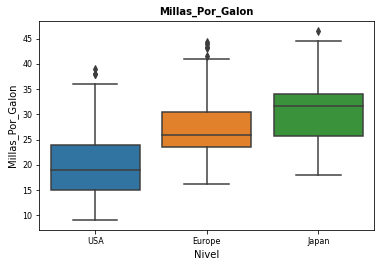

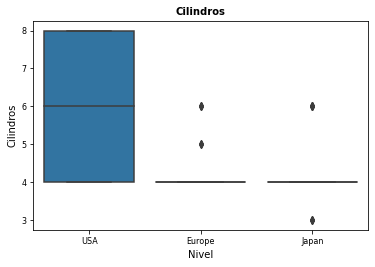

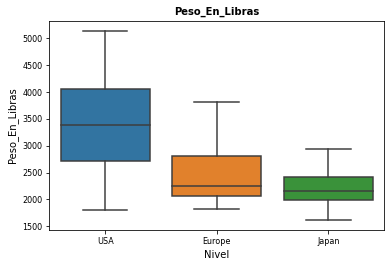

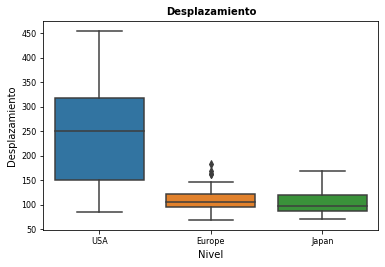

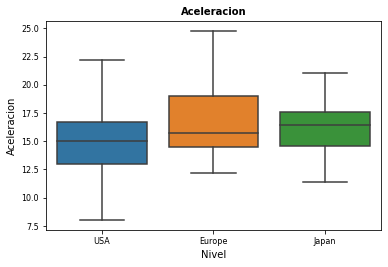

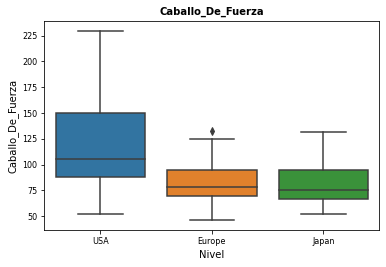

In [214]:
# Importamos las librerías a usar
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# CAJAS Y BIGOTES

# Creamos la funcion que realizará el gráfico
def cajas_y_bigotes(columnas, data, x): # parámetros
  
  for i, columna in enumerate(columnas): 
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.boxplot(
        x = x,
        y = columna,
        data  = data,
        )
    ax.set_title(columna, fontsize = 10, fontweight = "bold")
    ax.tick_params(labelsize = 8)
    ax.set_xlabel("Nivel")

# Declaración de datos
DF_grafico = DF_Autos_num2[var_num]
DF_grafico['Pais'] = DF_Autos['Pais_Origen'].apply(str)
columnas = var_num
var_cualitativa = DF_grafico.Pais

# Impresión de gráfico
cajas_y_bigotes(columnas, DF_Autos_num2, var_cualitativa)


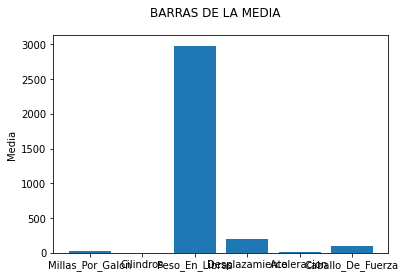

In [215]:
# BARRAS DE LA MEDIA

# Importamos la librería a usar
import matplotlib.pyplot as plt

# Declaración de datos
DF_Grafico2 = DF_Autos_num2[var_num]
Medias = DF_Grafico2.mean(axis=0)
Categorias = var_num

# Formateo y impresión de gráfico
plt.bar(Categorias, Medias)
plt.suptitle('BARRAS DE LA MEDIA')
plt.ylabel('Media')
plt.show()

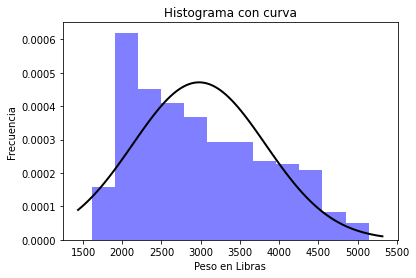

In [241]:
# Importamos las librerías a usar
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Declaración de datos
datos = DF_Autos_num2['Peso_En_Libras']
media = np.mean(datos)
desv_std = np.std(datos) 
  
# Generamos el histograma con 12 barras
plt.hist(datos, bins=12, density=True, alpha=0.5, color='b')
  
# Generamos la curva
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desv_std)

# Formateo y impresión de gráfico
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma con curva')
plt.ylabel('Frecuencia')
plt.xlabel('Peso en Libras')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation

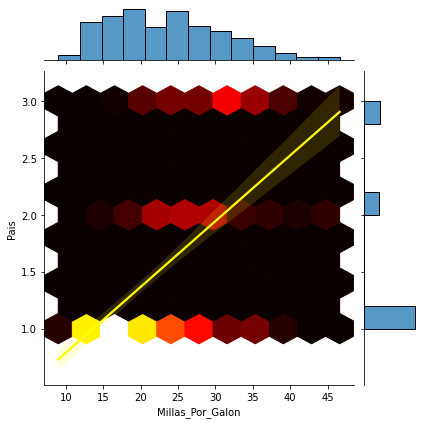

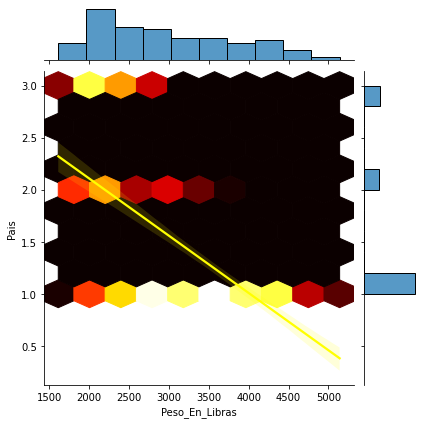

In [246]:
# Importamos las librerías a usar
import seaborn as sns

DF_Autos_num2['Pais'] = DF_Autos['Pais_Origen'].apply(pais).astype(int)

g = sns.jointplot(x='Millas_Por_Galon',
                  y = 'Pais',
                  data = DF_Autos_num2,
                  kind = 'hex',
                  cmap = 'hot',
                  size = 6)
sns.regplot(DF_Autos_num2['Millas_Por_Galon'], DF_Autos_num2['Pais'], ax=g.ax_joint, scatter=False, color= 'yellow')


g = sns.jointplot(x='Peso_En_Libras',
                  y = 'Pais',
                  data = DF_Autos_num2,
                  kind = 'hex',
                  cmap = 'hot',
                  size = 6)
sns.regplot(DF_Autos_num2['Peso_En_Libras'], DF_Autos_num2['Pais'], ax=g.ax_joint, scatter=False, color= 'yellow')



# SE INTENTO CREAR FUNCION histograma, pero demora demasiado en ejecutar

# def histograma(datos):
#   columnas_num = datos.select_dtypes(include=['float64', 'int']).columns

#   for i, columna in enumerate(datos):

#     g = sns.jointplot(x = columna,
#                       y = 'Pais',
#                       data = datos,
#                       kind = 'hex',
#                       cmap = 'hot',
#                       size = 6)
#     sns.regplot(datos[columna], datos['Pais'], ax=g.ax_joint, scatter=False, color= 'yellow')

# DF_Grafico = pd.concat([DF_Autos_num2[var_num], DF_Autos_num2[var_num2]])
# DF_Autos_num2['Pais'] = DF_Autos['Pais_Origen'].apply(pais).astype(int)

#histograma(DF_Autos_num2)


